In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
#import scipy
import importlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2

In [54]:
# get market data
label = 'CBK.DE' #DBK.DE ^IXIC
path_file = 'D://EDUCACION//Finanzas//Finanzas_Cuantitativas_Py//data//'+label+'.csv'
tabla_bruta = pd.read_csv(path_file)

tabla = pd.DataFrame()
tabla['date'] = pd.to_datetime(tabla_bruta['Date'],dayfirst=True)
tabla['close'] = tabla_bruta['Close'].values
tabla.sort_values(by='date', ascending=True)    # para verificar orden correcto
tabla['close_previous'] = tabla_bruta['Close'].shift(1) # deslizas los valores de Close hacia abajo
tabla['return_close'] = tabla['close']/tabla['close_previous']-1
tabla = tabla.dropna()
tabla = tabla.reset_index(drop=True)
x = tabla['return_close'].values
x_str = 'Retorno real '+label

# Metricas
x_size = len(x)
x_mean = np.mean(x)
x_std = np.std(x)
x_skew = skew(x)
x_kurtosis = kurtosis(x) # kurtosis en exceso
# sharpe: esperamos > 1.96 para que el 0 esté en el intervalo de confianza a la derecha
x_sharpe = x_mean/x_std*np.sqrt(252)      # anualizado  # tasa libre riesgo(rf): 0 asumimos
# con 95% probabilidad o confianza, no superaré el valor x_var_95, 
# o con 5% de probabilidad mi perdida será mayor o gual al valor de x_var_95
x_var_95 = np.percentile(x,5)  # el 5% de las veces perderás  x_var_95 o más
x_cvar_95 =  np.mean(x[x<= x_var_95])
jb = x_size/6*(x_skew**2 + 1/4*x_kurtosis**2) # equivalently jb < 6
p_value = 1 - chi2.cdf(jb, df=2)
x_is_normal = (p_value > 0.05) #  si cumple es normal

In [55]:
print('---Real market data---')
print('Indice es ' + label)
print('Media:' + str(x_mean))
print('standard deviation is. ' + str(x_std))
print('skewness :' + str(x_skew))
print('kurtosis :' + str(x_kurtosis))
print('VaR 95%',x_var_95 )
print('CVaR 95%',x_cvar_95 )
print('Sharpe :' + str(x_sharpe))
print('JB statistic: ' + str(jb))
print('p-value:' + str(p_value))
print('Normal?: ' + str(x_is_normal))

---Real market data---
Indice es CBK.DE
Media:-6.426714977313893e-05
standard deviation is. 0.027855528361699456
skewness :-0.05622078125162855
kurtosis :6.318672985078999
VaR 95% -0.04121820355577013
CVaR 95% -0.06267558378103244
Sharpe :-0.036625023276412115
JB statistic: 2106.743816209966
p-value:0.0
Normal?: False


In [56]:
round_digits = 4
plot_str = 'mean ' + str(np.round(x_mean,round_digits))\
    + ' | std dev ' + str(np.round(x_std,round_digits))\
    + ' | skewness ' + str(np.round(x_skew,round_digits))\
    + ' | kurtosis ' + str(np.round(x_kurtosis,round_digits)) + '\n'\
    + 'Jarque Bera ' + str(np.round(jb,round_digits))\
    + ' | p-value ' + str(np.round(p_value,round_digits))\
    + ' | is normal ' + str(x_is_normal) + '\n'\
    + 'Sharpe annual ' + str(np.round(x_sharpe,round_digits))\
    + ' | VaR 95% ' + str(np.round(x_var_95,round_digits))\
    + ' | CVaR 95% ' + str(np.round(x_cvar_95,round_digits)) 

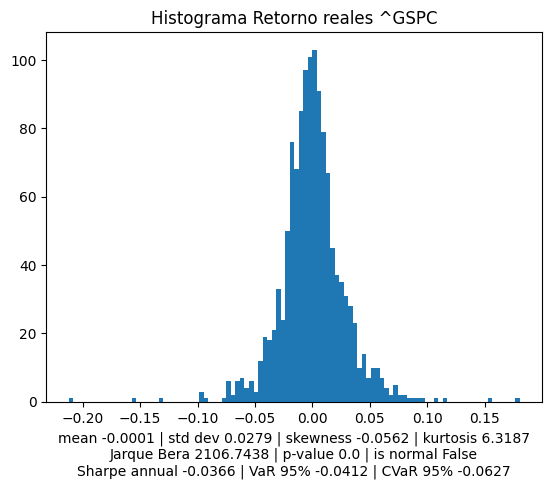

In [61]:
plt.figure()
plt.hist(x,bins=100)
plt.title('Histograma '+ x_str)
plt.xlabel(plot_str)
plt.show()

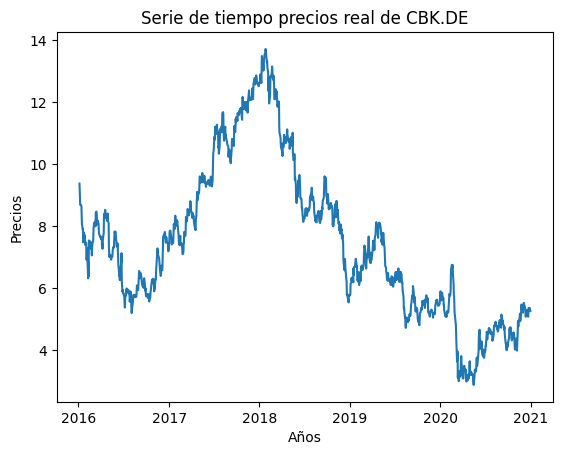

In [62]:
# plot seriestime
plt.figure()
plt.plot(tabla['date'], tabla['close'])
plt.title('Serie de tiempo precios real de '+label)
plt.xlabel('Años\n'+plot_str) 
plt.xlabel('Años') 
plt.ylabel('Precios')
plt.show()

Clase 6: refactoring 1 - funciones

In [28]:
import Funciones
# recargar cambios en el modulo, ya que no se actualizan aunque corramos el codigo
importlib.reload(Funciones)

ric = '^GSPC'
file_extension = 'csv'
x, x_str, tabla = Funciones.load_timeseries(ric)
tabla


,date,close,close_previous,return_close
0,2016-01-05,2016.709961,2012.660034,0.002012
1,2016-01-06,1990.260010,2016.709961,-0.013115
2,2016-01-07,1943.089966,1990.260010,-0.023700
3,2016-01-08,1922.030029,1943.089966,-0.010838
4,2016-01-11,1923.670044,1922.030029,0.000853
...,...,...,...,...
1252,2020-12-23,3690.010010,3687.260010,0.000746
1253,2020-12-24,3703.060059,3690.010010,0.003537
1254,2020-12-28,3735.360107,3703.060059,0.008723
1255,2020-12-29,3727.040039,3735.360107,-0.002227


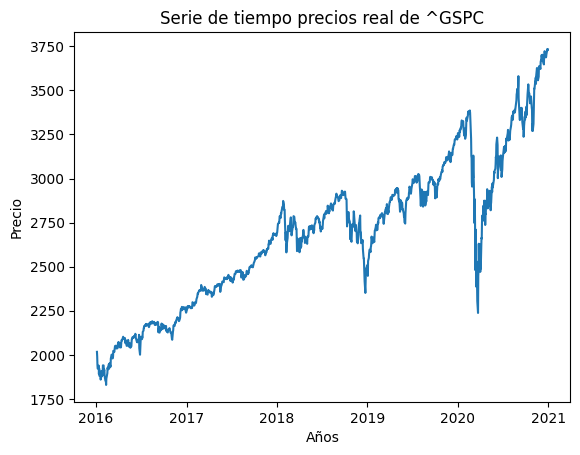

In [26]:
Funciones.plot_time_series_price(tabla,ric)

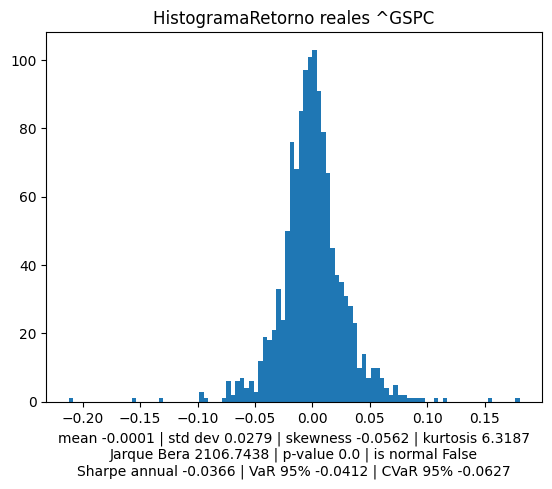

In [37]:
Funciones.plot_histogram(x, x_str,plot_str)

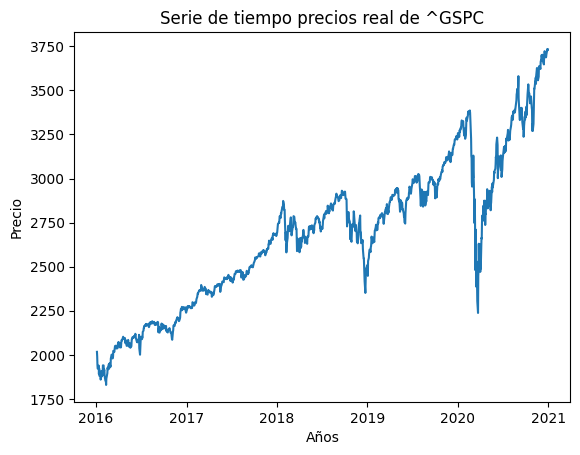

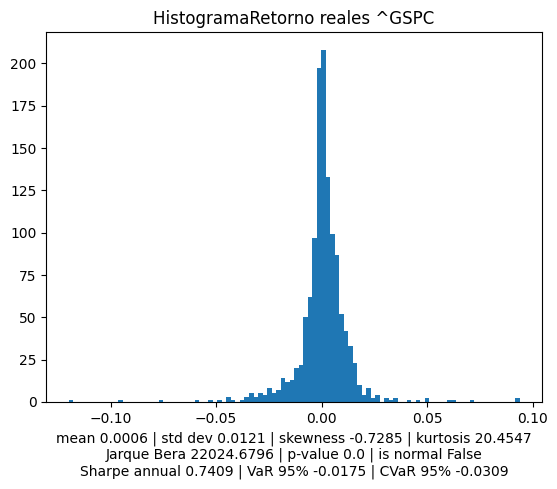

In [1]:
import importlib
import numpy as np
from scipy.stats import skew, kurtosis, chi2
# recargar cambios en el modulo, ya que no se actualizan aunque corramos el codigo
import Funciones
importlib.reload(Funciones)
import Clases
importlib.reload(Clases)

# Parametros de entrada
ric = '^GSPC'
file_extension = 'csv'

x, x_str, tabla = Funciones.load_timeseries(ric, file_extension)
Funciones.plot_time_series_price(tabla,ric)
z = Clases.metricas(x, x_str)
z.compute()
Funciones.plot_histogram(x, x_str,z.plot_str())


In [3]:
print(z.str_name)
print(z.plot_str())
print('-'*15)
print(z)

Retorno reales ^GSPC
mean 0.0006 | std dev 0.0121 | skewness -0.7285 | kurtosis 20.4547
Jarque Bera 22024.6796 | p-value 0.0 | is normal False
Sharpe annual 0.7409 | VaR 95% -0.0175 | CVaR 95% -0.0309
---------------
Retorno reales ^GSPC| size: 1257
mean 0.0006 | std dev 0.0121 | skewness -0.7285 | kurtosis 20.4547
Jarque Bera 22024.6796 | p-value 0.0 | is normal False
Sharpe annual 0.7409 | VaR 95% -0.0175 | CVaR 95% -0.0309


# 4. CAPM, alfas y betas

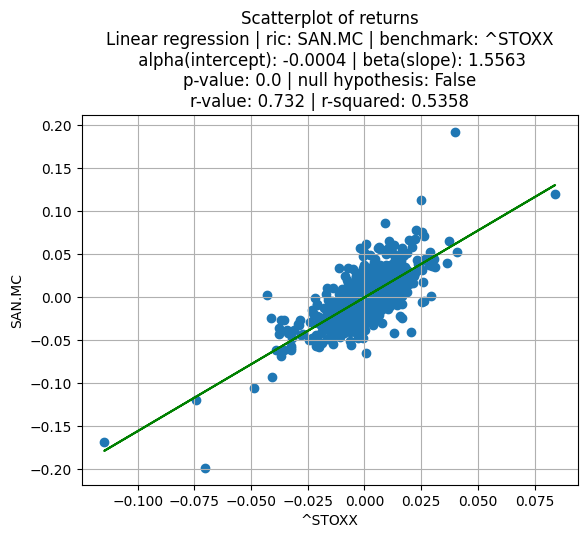

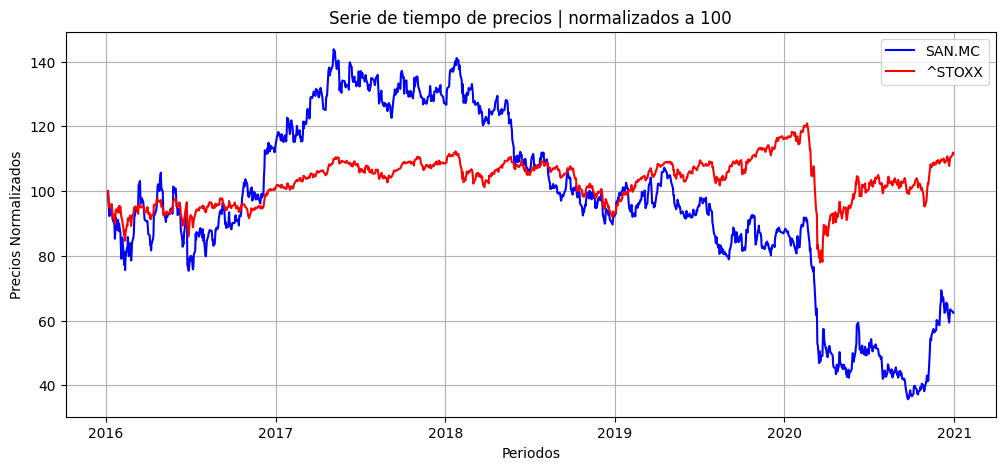

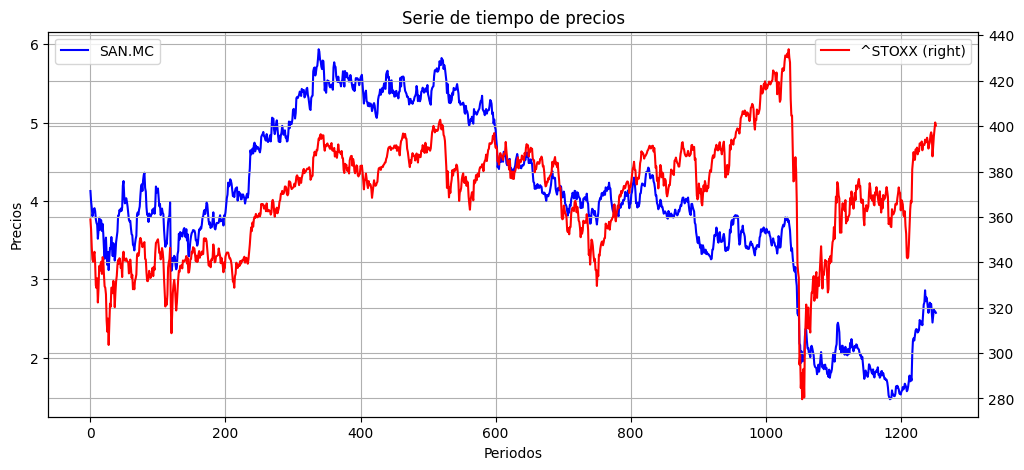

In [11]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import importlib
from scipy.stats import skew,kurtosis, chi2, linregress

# importar nuestros archivos
import Funciones
importlib.reload(Funciones)
import Clases
importlib.reload(Clases)

# Parametros
ric = 'SAN.MC' # activo: SAN.MC(santander) MT.AS BBVAMC REP.MC VWS.CO MXNUSD=X ^VIX
benchmark = '^STOXX' # mercado: ^STOXX(STOXX Europe 600) ^STOXX50E ^NASDAQ ^FCHI ^GDAXI

#x, y, t = Funciones.sincronizar_seriestiempo(ric, benchmark) # funciona pero mejor ocultar estas variables en una clase
capm = Clases.capm_manager(ric, benchmark)       # hasta aqui las variables estan vacias
capm.load_timeseries()
capm.compute()
# print(capm.alpha)
# print(capm.beta)
# print(capm.p_value)
# print(capm)
capm.scatterplot()
capm.plot_normalised()
capm.plot_dual_axes()

Retorno reales ^GSPC| size: 1257
mean 0.0006 | std dev 0.0121 | skewness -0.7285 | kurtosis 20.4547
Jarque Bera 22024.6796 | p-value 0.0 | is normal False
Sharpe annual 0.7409 | VaR 95% -0.0175 | CVaR 95% -0.0309


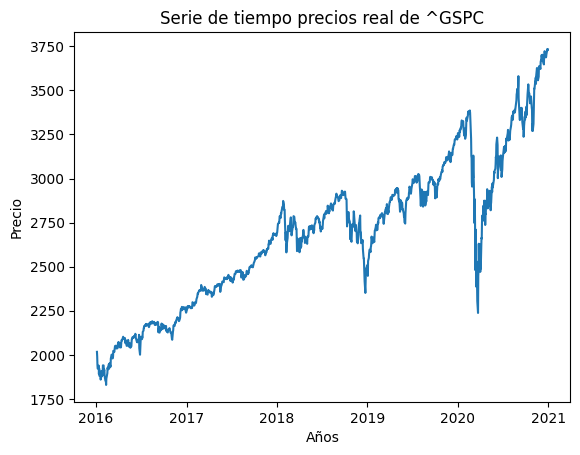

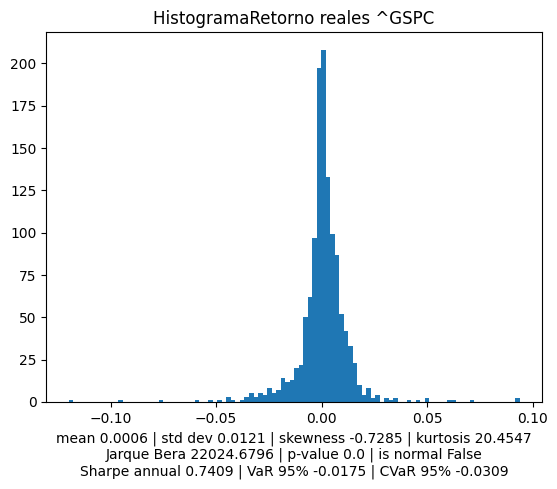

In [13]:
import importlib
import numpy as np
from scipy.stats import skew, kurtosis, chi2
# recargar cambios en el modulo, ya que no se actualizan aunque corramos el codigo
import Funciones
importlib.reload(Funciones)
import Clases
importlib.reload(Clases)

# Parametros de entrada
ric = '^GSPC'

z = Clases.metricas(ric)
z.load_timeseries()
z.compute()
print(z)

# plots activo individual
# Funciones.plot_time_series_price(z.tabla, z.ric)
# Funciones.plot_histogram(z.returns, z.str_name,z.plot_str())

z.plot_timeseries()
z.plot_histogram()

# 5. Cobertura de Portafolio

In [ ]:
ric = 'simulated'
type_random_varaible = 'normal' # normal exponential student chi-squared
size = 10**6
degrees_freedom = 9
jb = Clases.metricas(ric)
jb.generate_random_vector(type_random_varaible, size, degrees_freedom)
jb.compute()
jb.plot_histogram()
print(jb)
print('-------')